In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import regex as re 

In [2]:
sns.set_context("paper")

In [3]:
def normalize_names(string):
    return string.replace("org.tastytruffle.benchmarks.ListBenchmark.benchmarkGraal", "List.") \
                 .replace("org.tastytruffle.benchmarks.ResizableArrayBenchmark.benchmarkGraal", "ArrayBuffer.") \
                 .replace("org.tastytruffle.benchmarks.ListBenchmark.benchmarkTruffle", "List.") \
                 .replace("org.tastytruffle.benchmarks.ResizableArrayBenchmark.benchmarkTruffle", "ArrayBuffer.")

def extract_types(string):
    pattern = r'^(List|ArrayBuffer)\.(Int|Long|Double)(.+)$'
    match = re.fullmatch(pattern, string)
    return match[2]

def drop_types_from_name(string):
    pattern = r'^(List|ArrayBuffer)\.(Int|Long|Double)(.+)$'
    match = re.fullmatch(pattern, string)
    return match[1] + '.' + match[3]

def canonicalize(df):
    df['Benchmark'] = df['Benchmark'].apply(normalize_names)
    df['Type'] = df['Benchmark'].apply(extract_types)
    df['Benchmark'] = df['Benchmark'].apply(drop_types_from_name)
    return df

In [34]:
data_files = [
    ("graal_results.csv", "Graal"),
    ("unspecialized_results.csv", "Unspecialized Truffle"),
#    ("specialized_measurements.csv", "Specialized Truffle")
]

data = pd.DataFrame()
for (f, cat) in data_files:
    df = pd.read_csv(f)
    df["Origin"] = cat
    data = pd.concat([data, df]).drop_duplicates().reset_index(drop=True)

canonicalize(data)

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: arraySize,Origin,Type
0,List.Append,thrpt,1,20,848.282514,9.105671,ops/s,100000,Graal,Double
1,List.Append,thrpt,1,20,69.675153,0.846113,ops/s,1000000,Graal,Double
2,List.Append,thrpt,1,20,0.222602,0.055778,ops/s,10000000,Graal,Double
3,List.Contains,thrpt,1,20,237.905193,3.786252,ops/s,100000,Graal,Double
4,List.Contains,thrpt,1,20,0.527383,0.046416,ops/s,1000000,Graal,Double
...,...,...,...,...,...,...,...,...,...,...
499,ArrayBuffer.Reverse,thrpt,1,10,61.825518,2.402561,ops/s,800000,Unspecialized Truffle,Long
500,ArrayBuffer.Reverse,thrpt,1,10,56.923025,1.779615,ops/s,900000,Unspecialized Truffle,Long
501,ArrayBuffer.Reverse,thrpt,1,10,18.703944,0.865706,ops/s,2500000,Unspecialized Truffle,Long
502,ArrayBuffer.Reverse,thrpt,1,10,9.574278,0.254736,ops/s,5000000,Unspecialized Truffle,Long


RangeIndex(start=0, stop=504, step=1)
List.Append


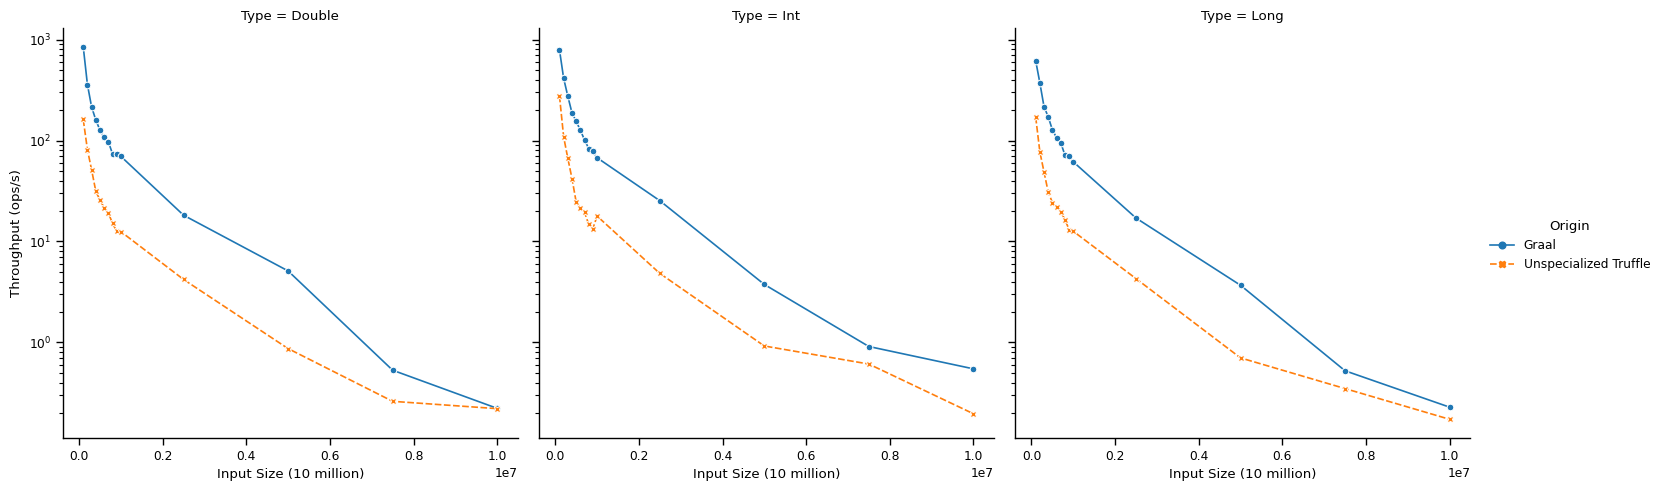

List.Contains


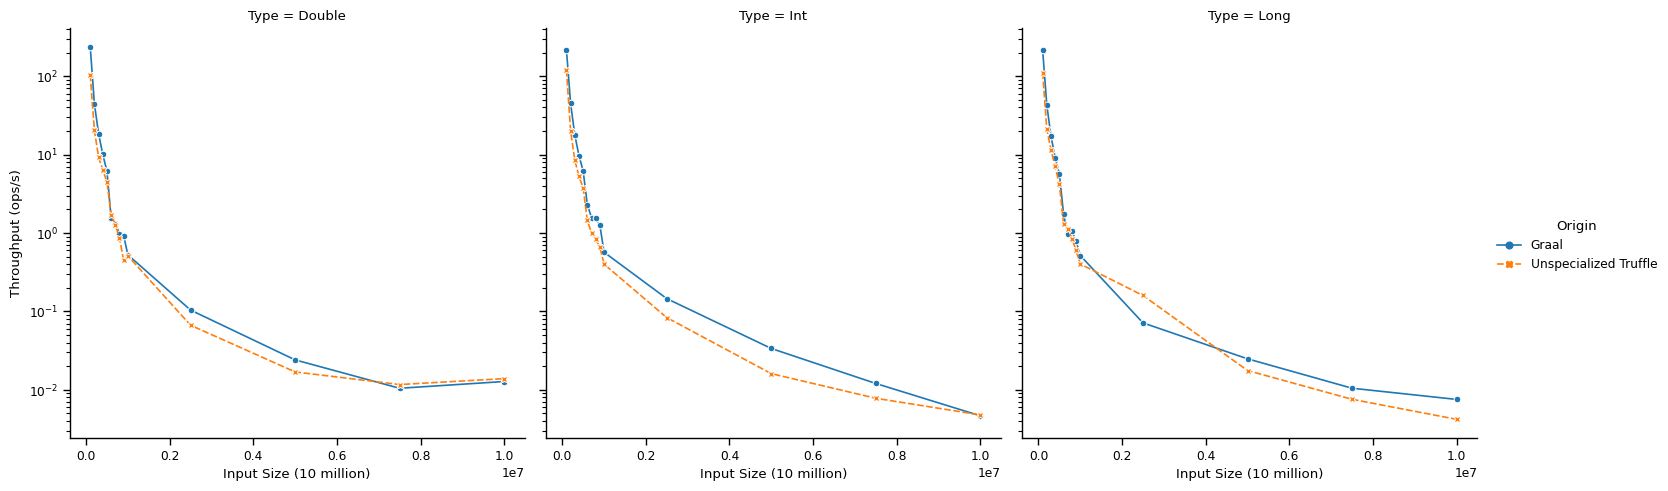

List.Hashcode


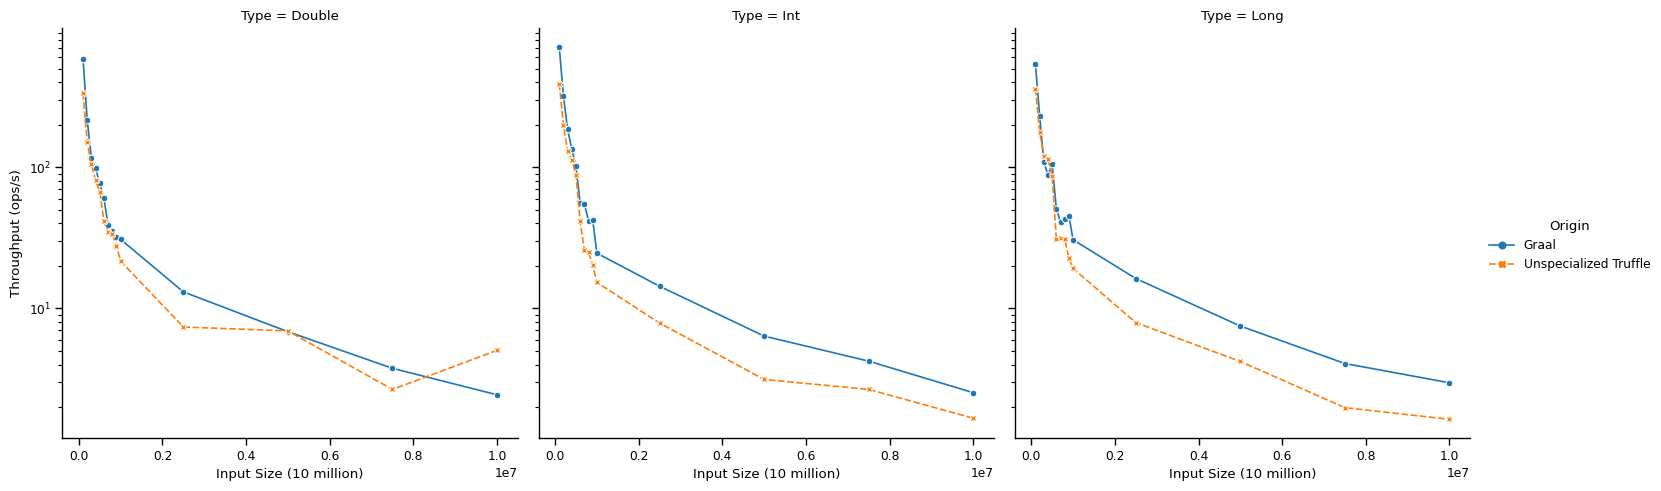

ArrayBuffer.Append


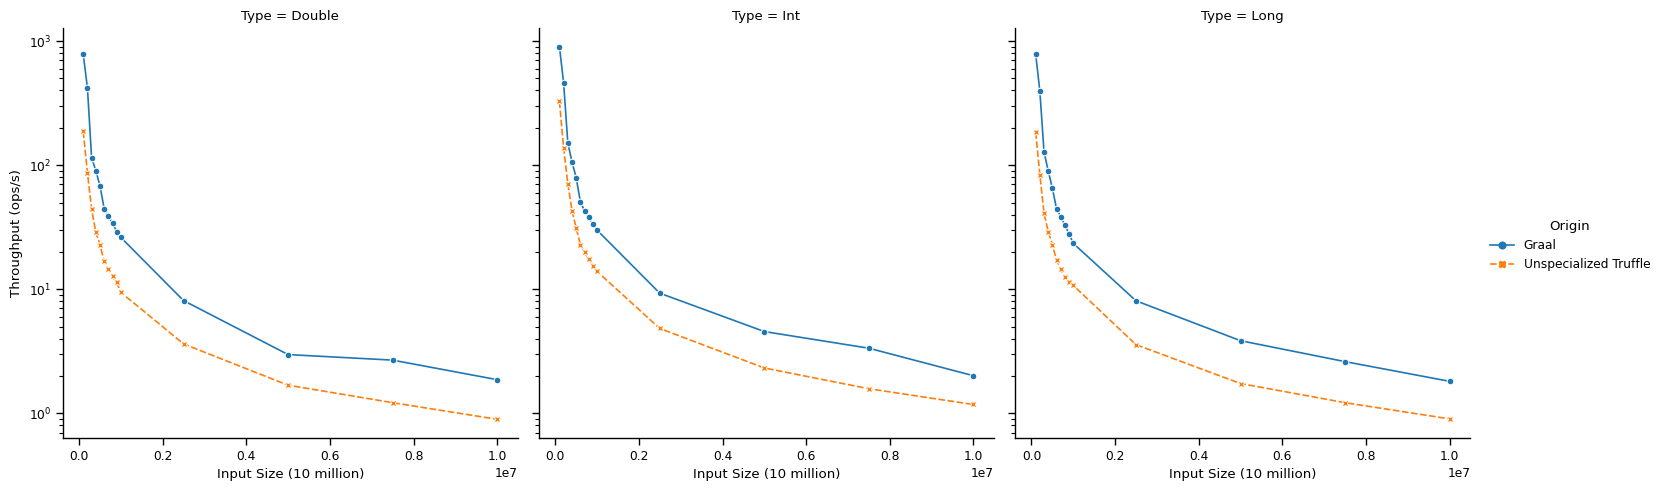

ArrayBuffer.Contains


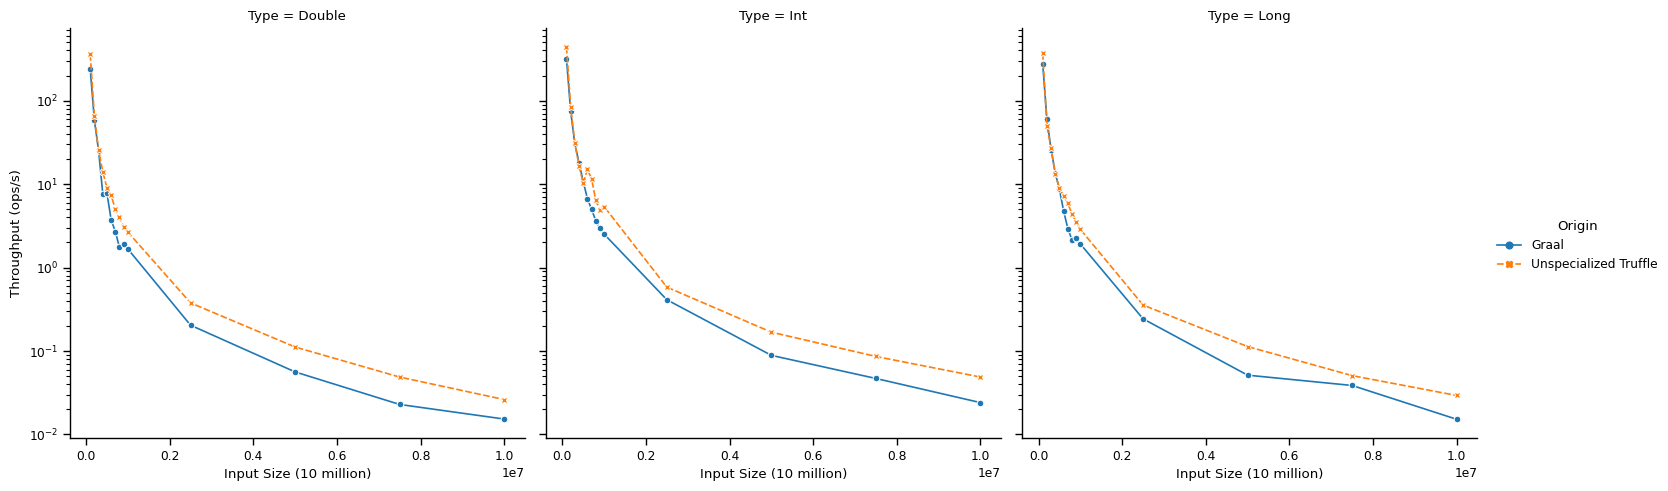

ArrayBuffer.Reverse


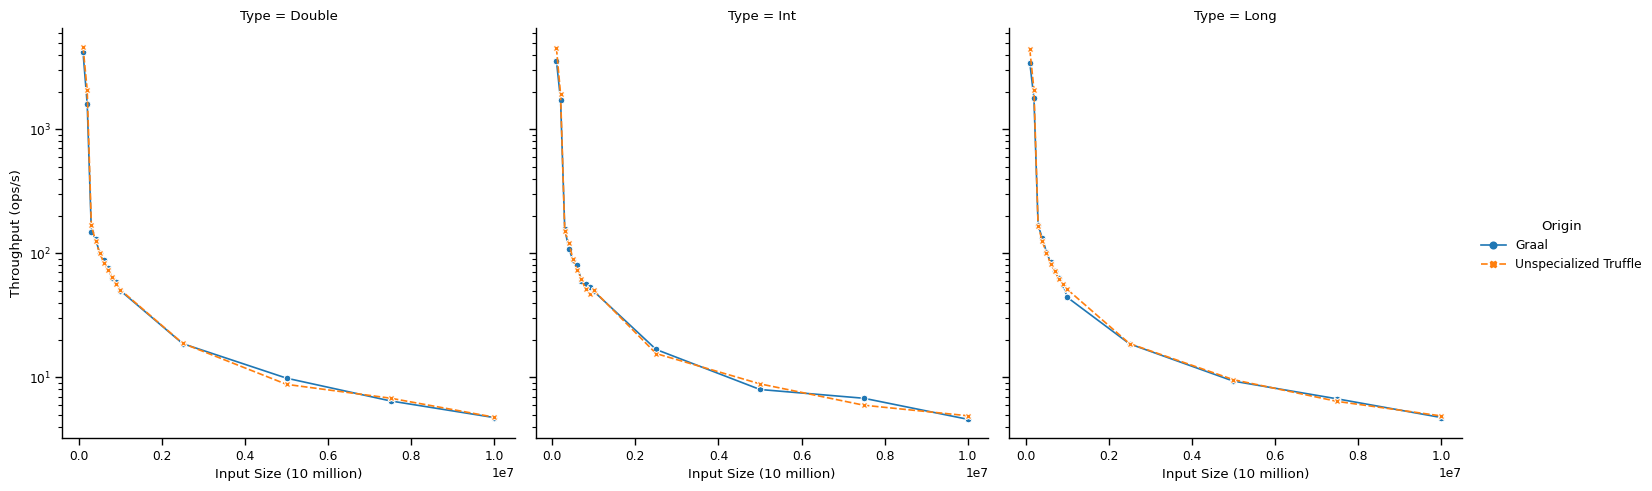

In [41]:
benchmarks = [
    "List.Append",
    "List.Contains",
    "List.Hashcode",
    "ArrayBuffer.Append",
    "ArrayBuffer.Contains",
    "ArrayBuffer.Reverse"
]

print(data.index)

for b in benchmarks:
    print(b)
    subset = data[data.Benchmark.eq(b)]
    splot = sns.relplot(
            data=subset,
            col="Type",
            x="Param: arraySize", 
            y="Score",
            hue="Origin",
            style="Origin",
            kind="line",
            markers=True,
        )
    splot.set(yscale="log") \
         .set_axis_labels("Input Size (10 million)", "Throughput (ops/s)")
    plt.show()